In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
import time
from sklearn.metrics import accuracy_score
from getData import getData
from ot_dis.mask_map import masking_map, masking_map_sequence, masking_map_partial
from ot_dis.wtk import wtk_distance
from arabic_load import get_train_data, get_test_data

DEBUG:matplotlib:matplotlib data path: c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Administrator\.matplotlib\fontlist-v330.json


In [2]:
import torch
import numpy as np
from getData import getData
from ot_dis.mask_map import masking_map, masking_map_sequence, masking_map_partial
from arabic_load import get_train_data, get_test_data
from ot_dis.wtk import wtk_distance

# 1. Load data

In [12]:
X_train, y_train, X_test, y_test = getData('BME', '../data/UCR/raw_data/')
xs, xt = X_train[8], X_test[9]

In [13]:
X_train_china, y_train_china, X_test_china, y_test_china = getData('Chinatown', '../data/UCR/raw_data/')
xs_china, xt_china = X_train_china[8], X_test_china[9]

In [14]:
len(X_train), len(X_test), X_train[0].shape

(30, 150, (128,))

In [15]:
X_train_arabic, y_train_arabic = get_train_data()
X_test_arabic, y_test_arabic = get_test_data()
xs_arabic, xt_arabic = X_train_arabic[0], X_test_arabic[1210]

In [16]:
xs_arabic.shape, xt_arabic.shape

((38, 13), (7, 13))

# 2. Metrics proposal

## 2.1. WTK

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\

(0.2819995880126953, 0.3253678601524448)

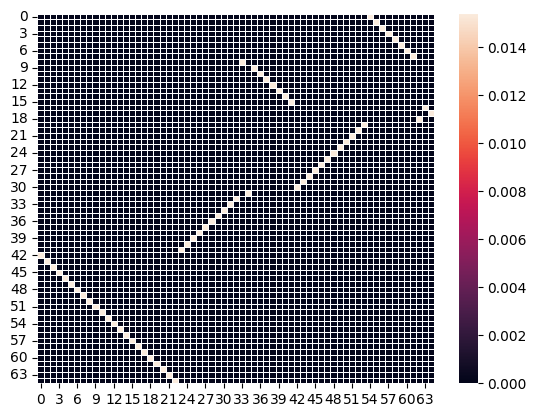

In [17]:
start_time = time.time()
pi_wtk, cost_wtk = wtk_distance(xs, xt, 64, plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.2. Pure masking

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001AF4A008B90>


(0.11100006103515625, 0.49769166526381736)

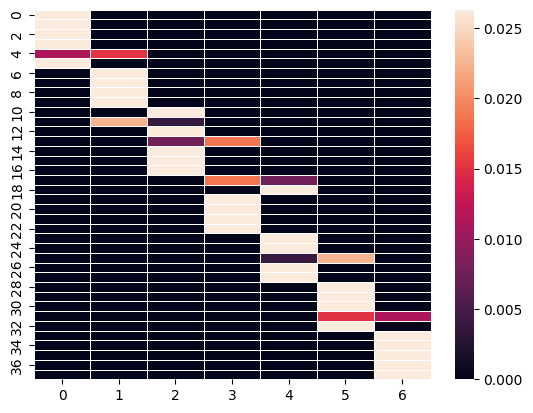

In [18]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs_arabic, xt_arabic, lamb=6,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001B000113A50>


(0.18400049209594727, 0.3382854427599636)

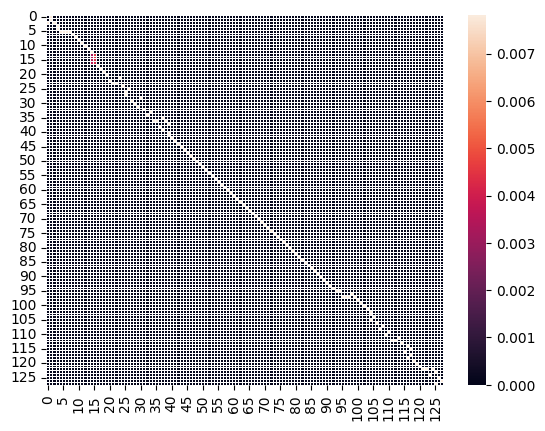

In [19]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs, xt, lamb=3,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.3. Partial masking

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001B0003AD010>


(0.06000065803527832, 23.26309753832218)

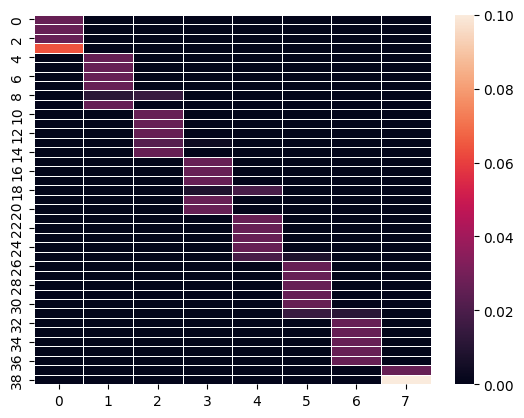

In [20]:
lamb = 4
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = masking_map_partial(xs_arabic, xt_arabic, s=0.9, plot=True, lamb=lamb)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001B0003E9D90>


(0.22999978065490723, 20.10958627091861)

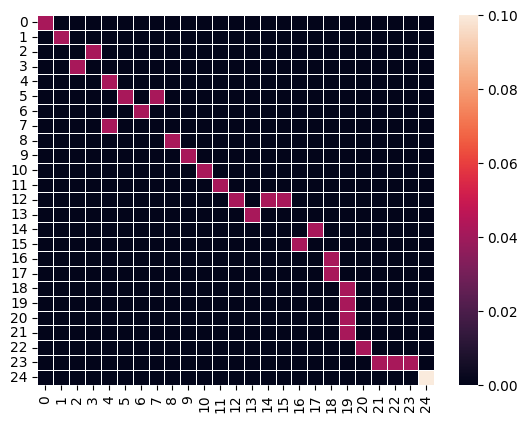

In [21]:
lamb = 4
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = masking_map_partial(xs_china, xt_china, s=0.9, plot=True, lamb=lamb)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

## 2.4. Sequence masking

# 3. Visualize distance matrix difference

In [13]:
import seaborn as sns
def plot_difference(C1, C2):
    C = C1-C2
    sns.heatmap(C, linewidth=0.5)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000020C081553D0>


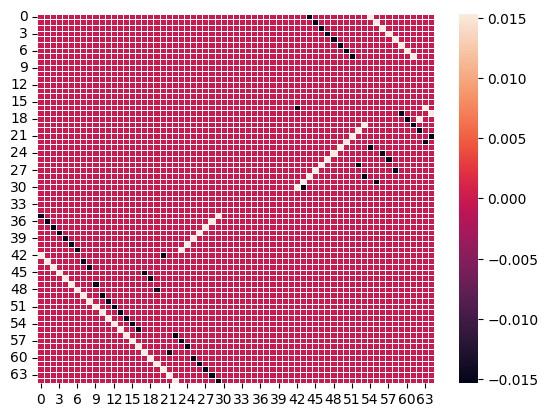

In [16]:
plot_difference(pi_wtk, pi_kpg_sequence)

# 4. Finding the optimal set for some UCR data

Tài liệu ví dụ về grid-search: [GridSearchKNN_Case_Study](https://github.com/pranav2chill/Grid-Search-in-KNN/blob/main/GridSearchKNN_Case_Study.ipynb)

Tài liệu ví dụ về cách sử dụng grid-search nâng cao: [Stack overflow](https://stackoverflow.com/questions/37924606/scikit-learn-how-do-we-define-a-distance-metrics-parameter-for-grid-search)

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
from sklearn.metrics import accuracy_score
from getData import getData
from knn import knn_masking_map, knn_masking_map_pure
from ot_dis.wtk import wtk_distance
from arabic_load import get_train_data, get_test_data
from sklearn.model_selection import GridSearchCV
from ot_dis.mask_map import masking_map, masking_map_sequence, masking_map_partial
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

DEBUG:matplotlib:matplotlib data path: c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Administrator\.matplotlib\fontlist-v330.json


In [2]:
def findTheShortestArray(list1, list2):
    min1 = min(list1, key=len)
    min2 = min(list2, key=len)
    min_len = min(len(min1), len(min2))
    frac1 = int(np.floor(min_len*10/100))
    frac2 = int(np.floor(min_len*30/100))
    frac3 = int(np.floor(min_len*50/100))
    frac4 = int(np.floor(min_len*70/100))
    frac5 = int(np.floor(min_len*90/100))
    min_array = [frac1, frac2, frac3, frac4, frac5]
    return min_array
size_list = [10, 30, 50, 70, 90]

In [3]:
def create_metric_param(size_array, lamb_limit):
    metric_param = []
    for i in range(1, lamb_limit):
        for index, kernel in enumerate(size_array):
            metric_param.append({
                "lamb": i, 
                "sub_length": kernel,
            })
    return metric_param

In [4]:
def knn_masking_map_pure(X_train, X_test, y_train, y_test, method="normal", k=1):
    size_array = findTheShortestArray(X_train, X_test)
    params = create_metric_param(size_array=size_array, lamb_limit=10)
    param_grid = [{
        'metric_params': params
    }]
    kpg_dict = {
        "sequence": masking_map_sequence,
        "normal": masking_map,
        "partial": masking_map_partial
    }
    clf = KNeighborsClassifier(n_neighbors = k, metric=kpg_dict[method], n_jobs=-1)
    clf = GridSearchCV(clf, param_grid, cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, clf

## BME

In [6]:
X_train, y_train, X_test, y_test = getData('BME', '../data/UCR/raw_data/')

In [7]:
size_array = findTheShortestArray(X_train, X_test)
size_array

[12, 38, 64, 89, 115]

In [8]:
for i in range(1, 6, 2):
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"BME (k={i}) ")
    accuracy, clf = knn_masking_map_pure(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, method="sequence", k=i)
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Best score: {clf.best_score_} - Best param: {clf.best_params_['metric_params']}\n")
with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
    file.write(f"--------------------------------------------------------------------------------------------------\n")

  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_M

## Chinatown

In [12]:
X_train, y_train, X_test, y_test = getData('Chinatown', '../data/UCR/raw_data/')

In [13]:
size_array = findTheShortestArray(X_train, X_test)
size_array

[2, 7, 12, 16, 21]

In [14]:
for i in range(1, 6, 2):
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Chinatown (k={i}) ")
    accuracy, clf = knn_masking_map_pure(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, method="sequence", k=i)
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Best score: {clf.best_score_} - Best param: {clf.best_params_['metric_params']}\n")
with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
    file.write(f"--------------------------------------------------------------------------------------------------\n")

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administr

## BeetleFly

In [5]:
X_train, y_train, X_test, y_test = getData('BirdChicken', '../data/UCR/raw_data/')

In [6]:
size_array = findTheShortestArray(X_train, X_test)
size_array

[51, 153, 256, 358, 460]

In [7]:
for i in range(1, 6, 2):
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"BirdChicken (k={i}) ")
    accuracy, clf = knn_masking_map_pure(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, method="sequence", k=i)
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Best score: {clf.best_score_} - Best param: {clf.best_params_['metric_params']}\n")
with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
    file.write(f"--------------------------------------------------------------------------------------------------\n")

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administr

: 